In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [2]:
data = pd.read_csv('final_features.csv')
data.head(2)

,Unnamed: 0,id,is_duplicate,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,q1_n_words_x,q2_n_words_x,word_common_x,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,1,1,66,57,14,12,10.0,...,23.793557,-20.588540,-25.390740,12.380504,-19.671304,16.618827,30.438993,43.384334,5.521897,2.243534
1,1,1,0,4,1,51,88,8,13,4.0,...,68.032543,1.352745,-25.395088,-7.580477,-23.430211,3.710812,1.435861,44.218956,11.410591,22.943367


In [3]:
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id', 'is_duplicate'],axis = 1, inplace=True)

In [4]:
data.head(2)

,freq_qid1_x,freq_qid2_x,q1len_x,q2len_x,q1_n_words_x,q2_n_words_x,word_common_x,word_total_x,word_share_x,freq_q1+freq_q2_x,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,...,23.793557,-20.588540,-25.390740,12.380504,-19.671304,16.618827,30.438993,43.384334,5.521897,2.243534
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,...,68.032543,1.352745,-25.395088,-7.580477,-23.430211,3.710812,1.435861,44.218956,11.410591,22.943367


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Columns: 229 entries, freq_qid1_x to 95_y
dtypes: float64(209), int64(20)
memory usage: 706.3 MB


<h2> Random train test split 70:30

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y_true, stratify= y_true, test_size = 0.3)

In [7]:
print("Number of data points in train data:", X_train.shape)
print("Number of data points in test data:", X_test.shape)

Number of data points in train data: (283003, 229)
Number of data points in test data: (121287, 229)


In [8]:
from collections import Counter
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_dist = Counter(y_train)
train_len = len(y_train)
print("Class 0:", int(train_dist[0])/train_len, "class 1:", int(train_dist[1])/train_len)
print("-"*10 ,"Distribution of output variable in test data", "-"*10)
test_dist = Counter(y_test)
test_len = len(y_test)
print("Class 0:", int(test_dist[0])/test_len, "class 1:", int(test_dist[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0: 0.6308025003268517 class 1: 0.36919749967314835
---------- Distribution of output variable in test data ----------
Class 0: 0.6308013224830361 class 1: 0.3691986775169639


In [9]:
from sklearn.metrics import confusion_matrix
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h1>Building Random Model finding worst case log-loss

In [10]:
from sklearn.metrics import accuracy_score, log_loss

Log loss of test data using random model 0.8873186899601229


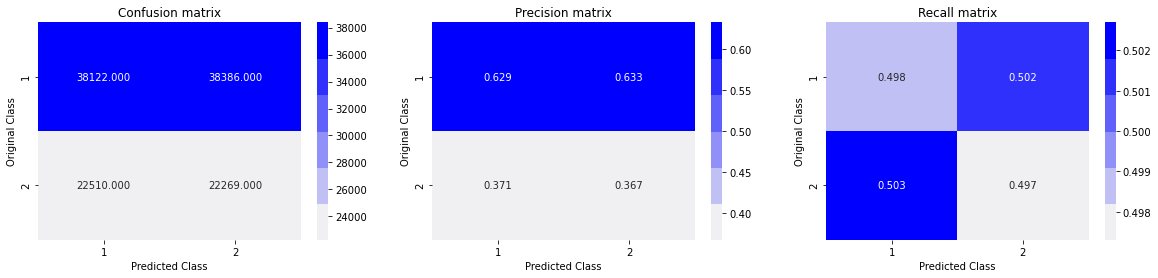

In [11]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print('Log loss of test data using random model', log_loss(y_test, predicted_y, eps = 1e-15))

predicted_y = np.argmax(predicted_y, axis = 1)
plot_confusion_matrix(y_test, predicted_y)

<h1> Logistic Regression with hyperparameter tuning

/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_

For alpha =  1e-05 The log loss is 0.4791362170907223


/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_

For alpha =  0.0001 The log loss is 0.4901302149438344
For alpha =  0.001 The log loss is 0.4910368426436856
For alpha =  0.01 The log loss is 0.45880256217160603
For alpha =  0.1 The log loss is 0.46507010155138806
For alpha =  1 The log loss is 0.4814333452205726
For alpha =  10 The log loss is 0.5093205682641501


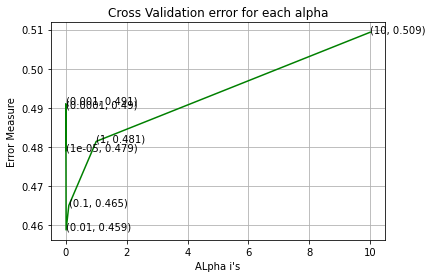

In [36]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
alpha = [10 ** x for x in range(-5, 2)]
log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i,penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method = 'sigmoid')
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels = clf.classes_, eps=1e-15))
    print("For alpha = ", i, "The log loss is", log_loss(y_test, predict_y, labels=clf.classes_, eps = 1e-15))

    
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array, c ='g')
for i,txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i], np.round(txt,3)), (alpha[i], log_error_array[i]))
    
plt.grid()
plt.title('Cross Validation error for each alpha')
plt.xlabel("ALpha i's")
plt.ylabel('Error Measure')
plt.show()

<h2> Linear SVM

For values of alpha =  1e-05 The log loss is: 0.4704210736850604
For values of alpha =  0.0001 The log loss is: 0.4765546762350987
For values of alpha =  0.001 The log loss is: 0.47802323758288723


/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


For values of alpha =  0.01 The log loss is: 0.47155855767014876


/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_

For values of alpha =  0.1 The log loss is: 0.5148631753446768


/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


For values of alpha =  1 The log loss is: 0.6047704562541754


/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/prateekbangwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


For values of alpha =  10 The log loss is: 0.6549410643071087


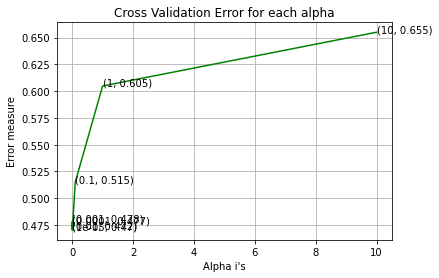

For values of best alpha =  1e-05 The train log loss is: 0.469702203369642
For values of best alpha =  1e-05 The test log loss is: 0.4704210736850604
Total number of data points : 121287


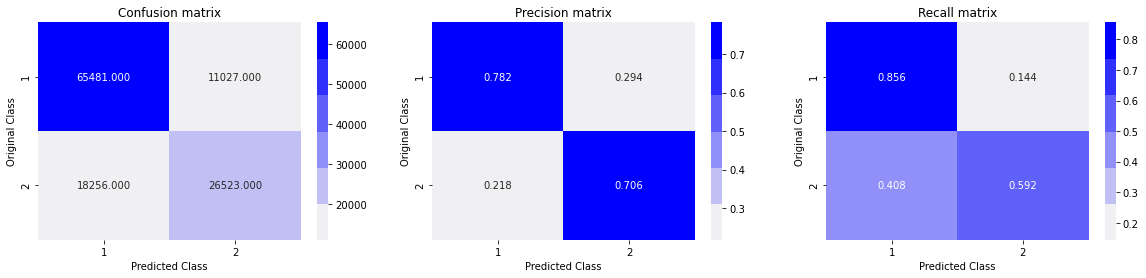

In [18]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


print("Training on best parameter:")
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> XGBOOST </h2>


In [12]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)


[0]	train-logloss:0.68490	valid-logloss:0.68489
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61523	valid-logloss:0.61531
[20]	train-logloss:0.56458	valid-logloss:0.56478
[30]	train-logloss:0.52650	valid-logloss:0.52671
[40]	train-logloss:0.49728	valid-logloss:0.49751
[50]	train-logloss:0.47438	valid-logloss:0.47455
[60]	train-logloss:0.45591	valid-logloss:0.45605
[70]	train-logloss:0.44127	valid-logloss:0.44133
[80]	train-logloss:0.42939	valid-logloss:0.42949
[90]	train-logloss:0.42000	valid-logloss:0.42005
[100]	train-logloss:0.41210	valid-logloss:0.41217
[110]	train-logloss:0.40534	valid-logloss:0.40538
[120]	train-logloss:0.39967	valid-logloss:0.39969
[130]	train-logloss:0.39497	valid-logloss:0.39495
[140]	train-logloss:0.39132	valid-logloss:0.39132
[150]	train-logloss:0.38788	valid-logloss:0.38790
[160]	train-logloss:0.38489	valid-logloss:0.38493
[170]	trai

NameError: name 'clf' is not defined